<h1 style="font-size:35px; color:purple; text-align:center"><u>Auto Insurance -</u></h1>
<h1 style="font-size:30px; color:purple; text-align:center"><u>Data Analysis, Cleaning &amp; Visualizations</u></h1>

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 30)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('../Auto_Insurance.csv')
df.shape

(9134, 25)

In [3]:
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,Four-Door Car,Medsize


In [4]:
df.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Vehicle Class                     object
Vehicle Size    

In [5]:
print('No of numerical features:', len(df.columns[df.dtypes != 'object']))
print('No of categorical features:', len(df.columns[df.dtypes == 'object']))

No of numerical features: 7
No of categorical features: 18


In [6]:
for col in df.columns[df.dtypes == 'object']:
    print('------\033[1m{}\033[0m------'.format(col))
    print('\033[1mUnique count:\033[0m\t {}\n'.format(df[col].nunique()))
    print('\033[1mUnique values:\033[0m\t {}\n'.format(df[col].unique()))
    print('\033[1mIs any null value?\033[0m\t {}\n\n'.format(df[col].isnull().any()))
    

------Customer------
Unique count:	 9134

Unique values:	 ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']

Is any null value?	 False


------Country------
Unique count:	 1

Unique values:	 ['US']

Is any null value?	 False


------State Code------
Unique count:	 5

Unique values:	 ['KS' 'NE' 'OK' 'MO' 'IA']

Is any null value?	 False


------State------
Unique count:	 5

Unique values:	 ['Kansas' 'Nebraska' 'Oklahoma' 'Missouri' 'Iowa']

Is any null value?	 False


------Response------
Unique count:	 2

Unique values:	 ['No' 'Yes']

Is any null value?	 False


------Coverage------
Unique count:	 3

Unique values:	 ['Basic' 'Extended' 'Premium']

Is any null value?	 False


------Education------
Unique count:	 5

Unique values:	 ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']

Is any null value?	 False


------Effective To Date------
Unique count:	 59

Unique values:	 ['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17

## Observations:
- **No null value in categorical variables**
- Data is collected from **5 states only** : <code style='color:crimson'>'Kansas'</code> <code style='color:crimson'>'Nebraska'</code> <code style='color:crimson'>'Oklahoma'</code> <code style='color:crimson'>'Missouri'</code> <code style='color:crimson'>'Iowa'</code>

Features that can be dropped or are redundant:
- <code style='color:crimson'>'Country'</code>, all records belong to <code style='color:crimson'>'US'</code> only.
- <code style='color:crimson'>'State'</code> as <code style='color:crimson'>'State Code'</code> represents same information.
- <code style='color:crimson'>'Sales Channel'</code> doesn't seems to have any effect on claim logically and same is the case with <code style='color:crimson'>Effective To Date</code>

In [7]:
# Dropping features mentioned above.
df = df.drop(columns = ['Country', 'State', 'Sales Channel', 'Effective To Date'])
print('New DataFrame shape:', df.shape)

New DataFrame shape: (9134, 21)


## Let's check out some numerical features

In [8]:
df.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000


## Observations:
- **No null value in numerical variables too**
- Average:
    - No. of Policies: 3
- On an average amount, claimed is &dollar;800
- **People tend to claim for insurance in around 15 months.**
- **IQR = Q3 - Q1 =~ &dollar;497**
- The more the no. of complaints open, the more claim is likely to be given.

Features that can be dropped or are redundant:
- <code style='color:crimson'>'Months Since Last Claim'</code> doesn't seems to have any effect on claim as insurance company would never give a claim based on this factor.
- <code style='color:crimson'>'Months Since Policy Inception'</code> doesn't seems to have any effect on claim as people would not go for claim neither the company would approve.

In [9]:
## Dropping columns above mentioned
df = df.drop(columns = ['Months Since Last Claim', 'Months Since Policy Inception'])
df.shape

(9134, 19)

## Visualizations

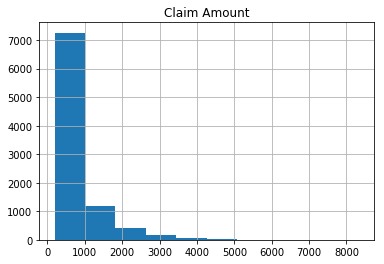

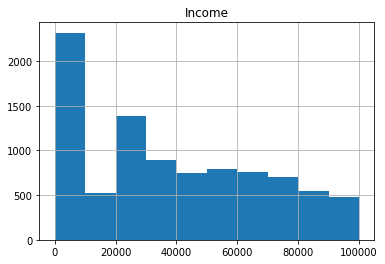

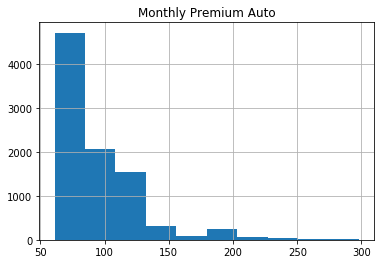

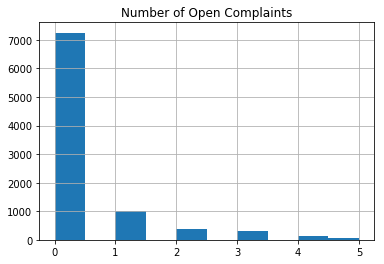

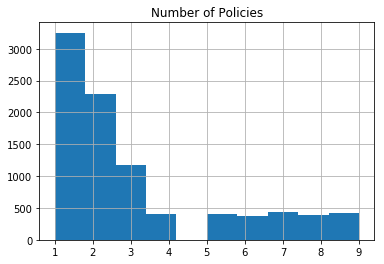

In [10]:
for col in list(df.columns[df.dtypes != 'object']):
    df.hist(col)
    plt.show()

## Observations:
- Lot of people have 3 or less policies
- Most of the people do not have any open complaint
- Most of the people pay premium < &dollar;150
- Most people have claimed amt < &dollar;2000

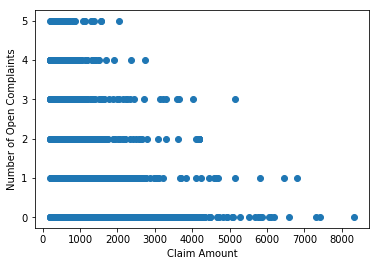

In [11]:
y = 'Number of Open Complaints'
x = 'Claim Amount'
plt.scatter(y = df[y], x=df[x])
plt.xlabel(x)
plt.ylabel(y)
plt.show()

## Observations:
- Most of the claims have been settled.
- <code style='color:crimson'>'Number of Open Complaints'</code> is not a good indicator for claim prediction.

In [12]:
# Dropping 'Number of Open Complaints'
df = df.drop(columns = ['Number of Open Complaints'])
df.shape

(9134, 18)

### Income vs. Claim Amount

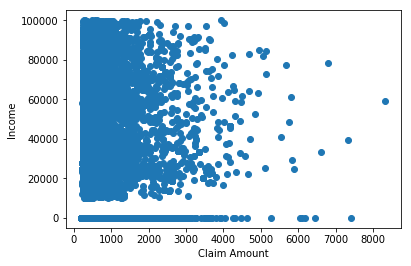

In [13]:
y = 'Income'
x = 'Claim Amount'
plt.scatter(y = df[y], x=df[x])
plt.xlabel(x)
plt.ylabel(y)
plt.show()

> **<code style='color:crimson'>'Income'</code> doesn't seems to have any good relation with <code style='color:crimson'>'Claim amount'</code>**

### Monthly Premium Auto vs. Claim Amount

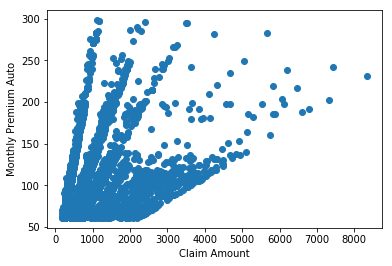

In [14]:
y = 'Monthly Premium Auto'
x = 'Claim Amount'
plt.scatter(y = df[y], x=df[x])
plt.xlabel(x)
plt.ylabel(y)
plt.show()

> **It seems <code style='color:crimson'>'Monthly Premium Auto'</code> has some relations with <code style='color:crimson'>'Claim amount'</code>**

### Number of Policies vs. Claim Amount

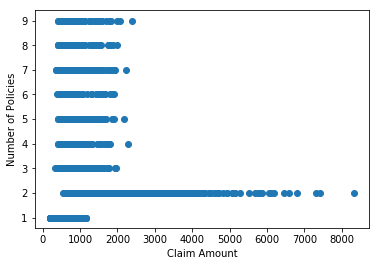

In [15]:
y = 'Number of Policies'
x = 'Claim Amount'
plt.scatter(y = df[y], x=df[x])
plt.xlabel(x)
plt.ylabel(y)
plt.show()

> **It looks like people having 2 policies have claimed more amount together than others.**

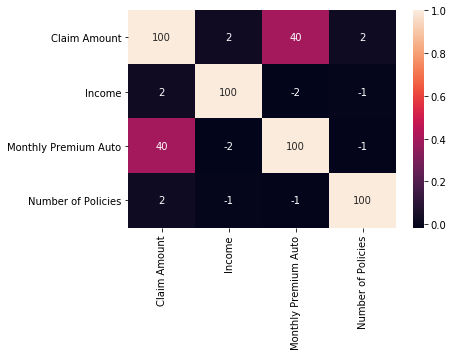

In [16]:
corr = df.corr()

plt.figure(figsize=(6,4))
sns.heatmap(data = corr, annot = corr*100, fmt = '.0f')
plt.show()

## Observations: 
> **Above correlation heat map confirms <code style='color:crimson'>'Income'</code> doesn't have any strong raltion with <code style='color:crimson'>'Claim Amount'</code>. We can consider to remove it.**

> **Although <code style='color:crimson'>'Number of Policies'</code> is also not having strong correlation but we can see from the above scatter plot that it tells us that people having two policies are more likely to get a claim. Hence, keeping this feature.**

In [17]:
# Dropping 'Income'
df = df.drop(columns = ['Income'])
df.shape

(9134, 17)

<hr>
## Checking out categorical features

In [18]:
df.describe(include = 'object')

,Customer,State Code,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Claim Reason,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,5,2,3,3,3,9,4,6,3
top,WH80404,MO,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Collision,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,5698,4658,5779,5298,6788,3426,3752,4621,6424


In [19]:
cats = list(df.columns[df.dtypes == 'object'])
print(cats)

['Customer', 'State Code', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Claim Reason', 'Vehicle Class', 'Vehicle Size']


State Code


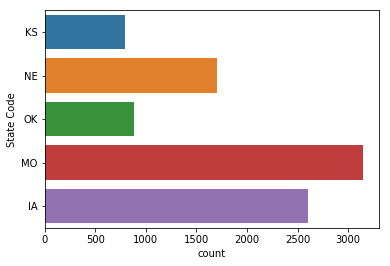

Response


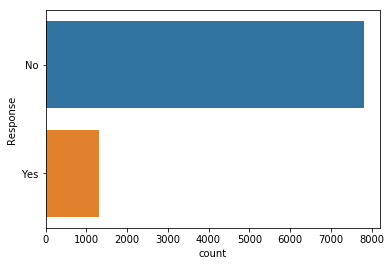

Coverage


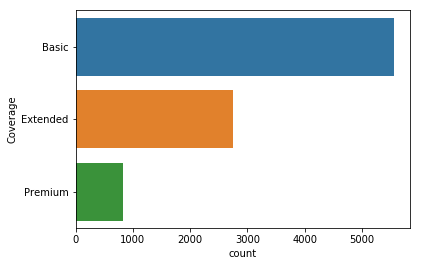

Education


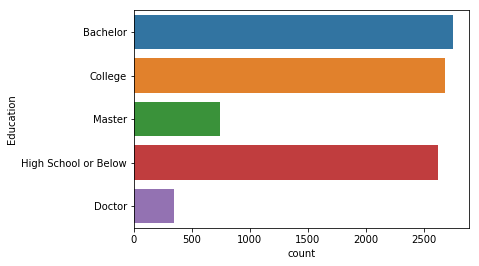

EmploymentStatus


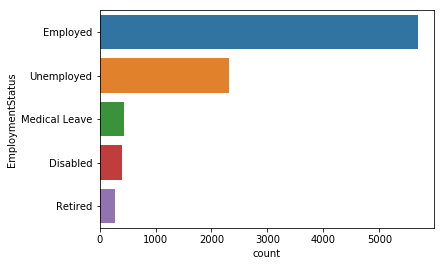

Gender


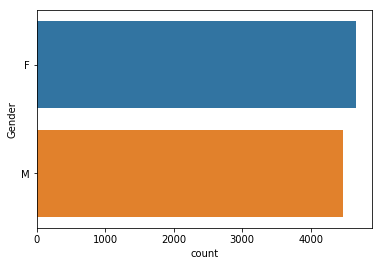

Location Code


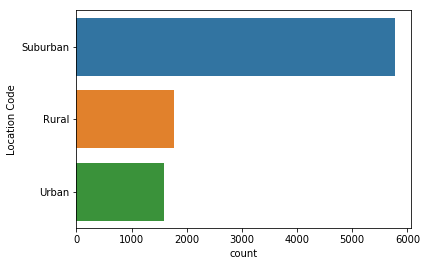

Marital Status


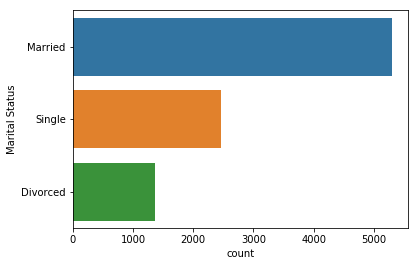

Policy Type


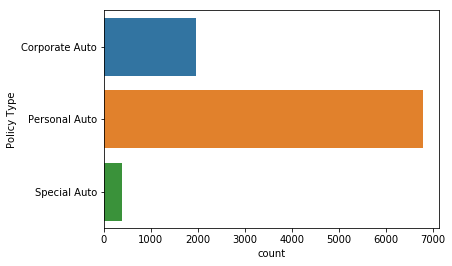

Policy


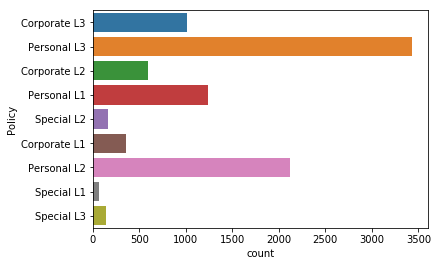

Claim Reason


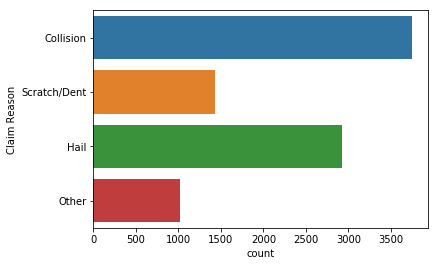

Vehicle Class


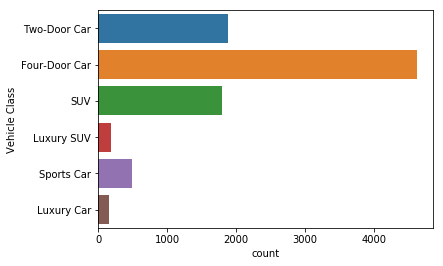

Vehicle Size


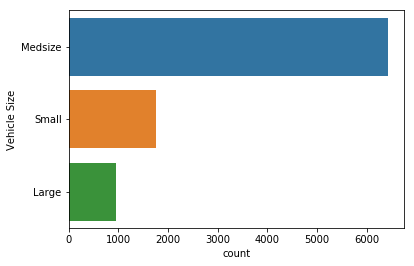

In [20]:
for cat in cats:
    if cat != 'Customer':
        print(cat)
        sns.countplot(y = cat, data = df)
        plt.show()

In [21]:
df['Vehicle Class'].replace('Luxury Car', 'Sports Car', inplace = True)
df['Vehicle Class'].replace('Luxury SUV', 'SUV', inplace = True)

In [22]:
df['Policy'].replace('Special L1', 'Special', inplace = True)
df['Policy'].replace('Special L2', 'Special', inplace = True)
df['Policy'].replace('Special L3', 'Special', inplace = True)

df['Policy'].replace('Personal L1', 'Personal', inplace = True)
df['Policy'].replace('Personal L2', 'Personal', inplace = True)
df['Policy'].replace('Personal L3', 'Personal', inplace = True)

df['Policy'].replace('Corporate L1', 'Corporate', inplace = True)
df['Policy'].replace('Corporate L2', 'Corporate', inplace = True)
df['Policy'].replace('Corporate L3', 'Corporate', inplace = True)

In [23]:
df['EmploymentStatus'].replace('Disabled', 'Medical Leave', inplace = True)

State Code


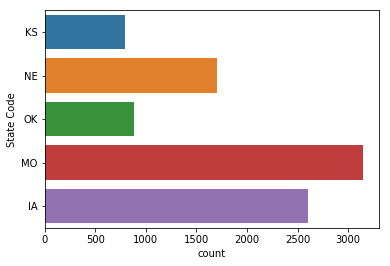

Response


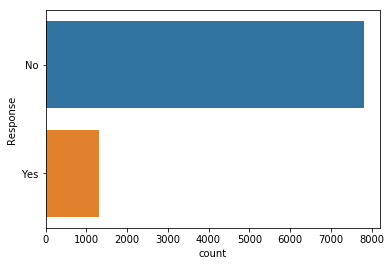

Coverage


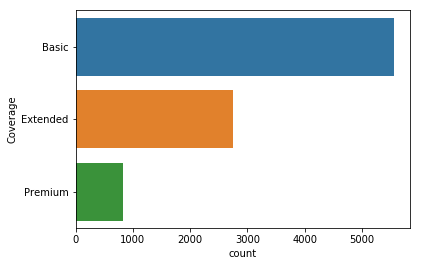

Education


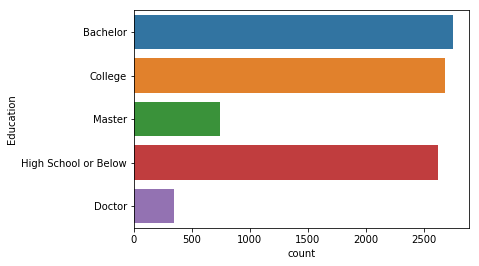

EmploymentStatus


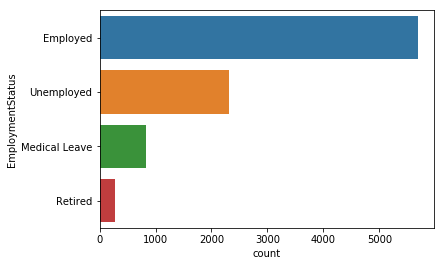

Gender


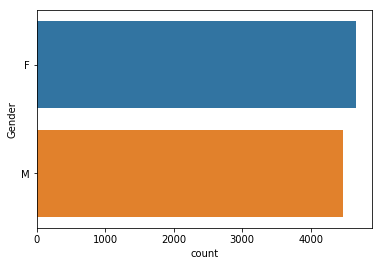

Location Code


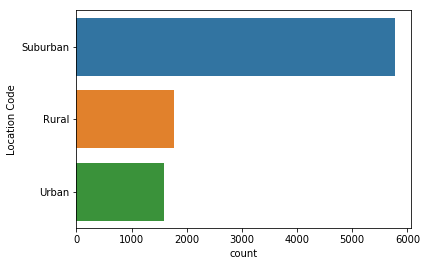

Marital Status


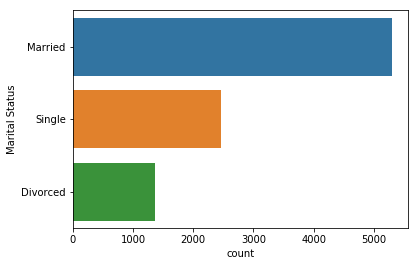

Policy Type


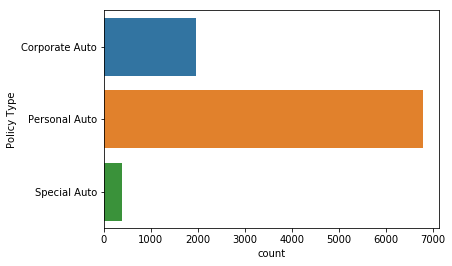

Policy


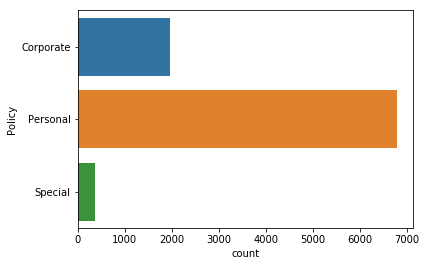

Claim Reason


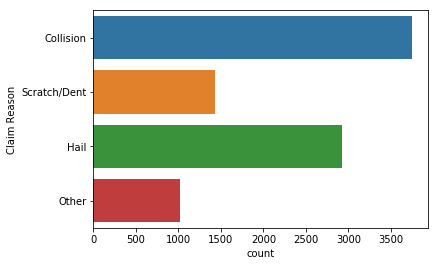

Vehicle Class


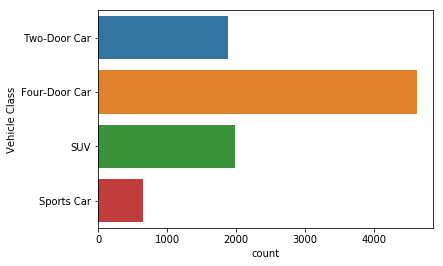

Vehicle Size


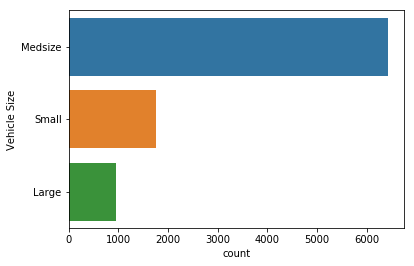

In [24]:
for cat in cats:
    if cat != 'Customer':
        print(cat)
        sns.countplot(y = cat, data = df)
        plt.show()

## Observations:
- **<code style='color:crimson'>'Customer'</code> is having unique value for every observation, it isn't telling anything about <code style='color:crimson'>'Claim Amount'</code>**

Dropping deatures: 
- **<code style='color:crimson'>Policy'</code> & <code style='color:crimson'>'Policy Type'</code> are redundant**
- **<code style='color:crimson'>'Vehicle Size'</code> also depends on <code style='color:crimson'>'Vehicle Type'</code>, so keeping one feature as both describe same thing ultimately.** 
- **People do not make insurance claims based on their <code style='color:crimson'>'Marital Status'</code>, if they have insurance and something went wrong, they would claim without thinking about their status. Same is the case with <code style='color:crimson'>'Gender'</code>**


In [25]:
df = df.drop(columns = ['Customer', 'Vehicle Size', 'Policy Type', 'Marital Status', 'Gender', 'Response',])
df.shape

(9134, 11)

In [26]:
df.head()

,State Code,Claim Amount,Coverage,Education,EmploymentStatus,Location Code,Monthly Premium Auto,Number of Policies,Policy,Claim Reason,Vehicle Class
0,KS,276.351928,Basic,Bachelor,Employed,Suburban,69,1,Corporate,Collision,Two-Door Car
1,NE,697.953590,Extended,Bachelor,Unemployed,Suburban,94,8,Personal,Scratch/Dent,Four-Door Car
2,OK,1288.743165,Premium,Bachelor,Employed,Suburban,108,2,Personal,Collision,Two-Door Car
3,MO,764.586183,Basic,Bachelor,Unemployed,Suburban,106,7,Corporate,Collision,SUV
4,KS,281.369258,Basic,Bachelor,Employed,Rural,73,1,Personal,Collision,Four-Door Car


In [27]:
# Drop duplicates if any.
df = df.drop_duplicates()
df.shape

(8762, 11)

> **We had 9134 - 8762 = 372 duplicate observations**

In [28]:
df.to_csv('cleaned_auto_insurance.csv', index = False)

In [30]:
cat_cols = list(df.columns[df.dtypes == 'object'])
cat_cols

['State Code',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Location Code',
 'Policy',
 'Claim Reason',
 'Vehicle Class']

In [31]:
df = pd.get_dummies(data = df, columns = cat_cols)
print(df.shape)
df.head()

(8762, 34)


,Claim Amount,Monthly Premium Auto,Number of Policies,State Code_IA,State Code_KS,State Code_MO,State Code_NE,State Code_OK,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,...,EmploymentStatus_Unemployed,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Policy_Corporate,Policy_Personal,Policy_Special,Claim Reason_Collision,Claim Reason_Hail,Claim Reason_Other,Claim Reason_Scratch/Dent,Vehicle Class_Four-Door Car,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
0,276.351928,69,1,0,1,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
1,697.953590,94,8,0,0,0,1,0,0,1,0,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0
2,1288.743165,108,2,0,0,0,0,1,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
3,764.586183,106,7,0,0,1,0,0,1,0,0,1,0,0,0,...,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0
4,281.369258,73,1,0,1,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0


In [32]:
df.to_csv('finalized_insurance_data.csv', index = False)

## Conclusion of the Notebook:
> **In this notebook, we have cleaned, analyzed and visualized the auto insurance data and saved cleaned data into a new file.**
## Thank You!
**for going through the project. <br>Please check out notebook 2 for model training and preformance evaluation.**